## Transforming COVID-19 Data with Pandas & Visualizing with Seaborn

This project demonstrates loading a CSV into a Pandas DF, manipulating the resultant DF and then visualizing the DF in Seaborn

In [7]:
#Import
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# get data and put into pandas data frame
url = 'https://covidtracking.com/api/v1/states/daily.csv'

#creates df from csv
df = pd.read_csv(url, 
                 usecols = ['date','state','positive','negative', 'positiveIncrease', 'totalTestResultsIncrease', 'death', 'deathIncrease'])

df   


,date,state,positive,negative,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,20210307,AK,56886.0,NaN,305.0,0,0,0
1,20210307,AL,499819.0,1931711.0,10148.0,408,2347,-1
2,20210307,AR,324818.0,2480716.0,5319.0,165,3380,22
3,20210307,AS,0.0,2140.0,0.0,0,0,0
4,20210307,AZ,826454.0,3073010.0,16328.0,1335,45110,5
...,...,...,...,...,...,...,...,...
20775,20200117,WA,0.0,NaN,NaN,0,0,0
20776,20200116,WA,0.0,NaN,NaN,0,0,0
20777,20200115,WA,0.0,NaN,NaN,0,0,0
20778,20200114,WA,0.0,NaN,NaN,0,0,0


In [9]:
# convert date from integer yyyymmdd to date format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")

# convert non-missing postitive and negative from float to int
df.death = df.death.fillna(0.0).astype(int) # works because I added the 'death' field in the df
 
df 

,date,state,positive,negative,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,2021-03-07,AK,56886.0,NaN,305,0,0,0
1,2021-03-07,AL,499819.0,1931711.0,10148,408,2347,-1
2,2021-03-07,AR,324818.0,2480716.0,5319,165,3380,22
3,2021-03-07,AS,0.0,2140.0,0,0,0,0
4,2021-03-07,AZ,826454.0,3073010.0,16328,1335,45110,5
...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,0.0,NaN,0,0,0,0
20776,2020-01-16,WA,0.0,NaN,0,0,0,0
20777,2020-01-15,WA,0.0,NaN,0,0,0,0
20778,2020-01-14,WA,0.0,NaN,0,0,0,0


In [10]:
#Filter dataframe to just the 3/7/21
df_current = df.loc[df['date']=="2021-03-07"]

df_current


,date,state,positive,negative,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,2021-03-07,AK,56886.0,NaN,305,0,0,0
1,2021-03-07,AL,499819.0,1931711.0,10148,408,2347,-1
2,2021-03-07,AR,324818.0,2480716.0,5319,165,3380,22
3,2021-03-07,AS,0.0,2140.0,0,0,0,0
4,2021-03-07,AZ,826454.0,3073010.0,16328,1335,45110,5
5,2021-03-07,CA,3501394.0,NaN,54124,3816,133186,258
6,2021-03-07,CO,436602.0,2199458.0,5989,840,38163,3
7,2021-03-07,CT,285330.0,NaN,7704,0,0,0
8,2021-03-07,DC,41419.0,NaN,1030,146,5726,0
9,2021-03-07,DE,88354.0,545070.0,1473,215,5867,9


In [11]:
df_death = df_current.sort_values(by = 'death',ascending=False) #sorts df by deaths in descending order

# Show output of new dataframe
df_death

,date,state,positive,negative,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
5,2021-03-07,CA,3501394.0,NaN,54124,3816,133186,258
47,2021-03-07,TX,2686818.0,NaN,44451,2953,76040,84
37,2021-03-07,NY,1681169.0,NaN,39029,6789,227768,59
10,2021-03-07,FL,1909209.0,9339038.0,32266,4024,64599,66
41,2021-03-07,PA,948643.0,3942124.0,24349,1658,52432,32
34,2021-03-07,NJ,812609.0,10186941.0,23574,2519,2519,17
16,2021-03-07,IL,1198335.0,NaN,23014,1068,68094,12
11,2021-03-07,GA,1023487.0,NaN,17906,1709,18827,1
38,2021-03-07,OH,978471.0,NaN,17656,735,29289,0
24,2021-03-07,MI,656072.0,NaN,16658,0,0,0


In [12]:
#Create new df
df_topdeaths = df.copy(deep=True) #copy the df

df_topdeaths.iloc[0:10]

,date,state,positive,negative,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,2021-03-07,AK,56886.0,NaN,305,0,0,0
1,2021-03-07,AL,499819.0,1931711.0,10148,408,2347,-1
2,2021-03-07,AR,324818.0,2480716.0,5319,165,3380,22
3,2021-03-07,AS,0.0,2140.0,0,0,0,0
4,2021-03-07,AZ,826454.0,3073010.0,16328,1335,45110,5
5,2021-03-07,CA,3501394.0,NaN,54124,3816,133186,258
6,2021-03-07,CO,436602.0,2199458.0,5989,840,38163,3
7,2021-03-07,CT,285330.0,NaN,7704,0,0,0
8,2021-03-07,DC,41419.0,NaN,1030,146,5726,0
9,2021-03-07,DE,88354.0,545070.0,1473,215,5867,9


In [13]:
#Add ranks
df_topdeaths['rank'] = df['death'].rank(ascending = 0) #adds rank column to df_topdeaths


df_topdeaths

,date,state,positive,negative,death,positiveIncrease,totalTestResultsIncrease,deathIncrease,rank
0,2021-03-07,AK,56886.0,NaN,305,0,0,0,13839.0
1,2021-03-07,AL,499819.0,1931711.0,10148,408,2347,-1,1967.0
2,2021-03-07,AR,324818.0,2480716.0,5319,165,3380,22,4168.0
3,2021-03-07,AS,0.0,2140.0,0,0,0,0,20079.5
4,2021-03-07,AZ,826454.0,3073010.0,16328,1335,45110,5,1087.0
...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,0.0,NaN,0,0,0,0,20079.5
20776,2020-01-16,WA,0.0,NaN,0,0,0,0,20079.5
20777,2020-01-15,WA,0.0,NaN,0,0,0,0,20079.5
20778,2020-01-14,WA,0.0,NaN,0,0,0,0,20079.5


In [14]:
topstates = df.values.tolist() #creates a list from the df

topstates[0:10] #shows top 10 states and their values

[['2021-03-07', 'AK', 56886.0, nan, 305, 0, 0, 0],
 ['2021-03-07', 'AL', 499819.0, 1931711.0, 10148, 408, 2347, -1],
 ['2021-03-07', 'AR', 324818.0, 2480716.0, 5319, 165, 3380, 22],
 ['2021-03-07', 'AS', 0.0, 2140.0, 0, 0, 0, 0],
 ['2021-03-07', 'AZ', 826454.0, 3073010.0, 16328, 1335, 45110, 5],
 ['2021-03-07', 'CA', 3501394.0, nan, 54124, 3816, 133186, 258],
 ['2021-03-07', 'CO', 436602.0, 2199458.0, 5989, 840, 38163, 3],
 ['2021-03-07', 'CT', 285330.0, nan, 7704, 0, 0, 0],
 ['2021-03-07', 'DC', 41419.0, nan, 1030, 146, 5726, 0],
 ['2021-03-07', 'DE', 88354.0, 545070.0, 1473, 215, 5867, 9]]

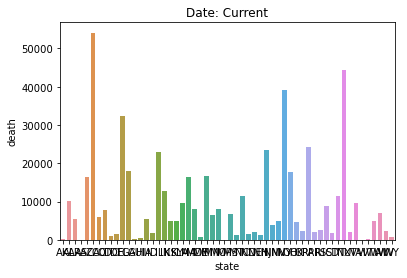

In [20]:
#bar chart showing Covid deaths by state
ax = sns.barplot(x="state", y="death", data=df_current).set(title="Date: Current") #shows requested bar chart on current date, but title is hardcoded